### dl2 demo
All the things we can do with dl2.

In [1]:
import dl2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
w1 = np.array([4., 3., 1., 5., 3., 1.])
w2 = np.array([5., 2., 3., 3., 2., 1.])
b = np.array([2., 5., 2., 6., 2., 2.])
x = np.array([1., 4., 1., 3., 3., 3.])
y = np.array([4., 3., 8., 1., 4., 1.])
f = lambda w1, w2, b: w1 * x ** 2 + w2 * x + b
print(f(w1, w2, b))

[11. 61.  6. 60. 35. 14.]


In [3]:
opt = dl2.GD([w1, w2, b], lr=1e-3, beta=0.1)
losses, grads = [], []

In [4]:
print(f'before training\npred: {f(w1, w2, b)}\ny: {y}]\nloss: {0.5 * np.sum((f(w1, w2, b) - y) ** 2)}\n')
for epoch in range(1000):
    dy = f(w1, w2, b) - y # gradient of loss w.r.t to output
    loss = 0.5 * np.sum(dy ** 2) # compute loss
    losses.append(loss)
    grads.append(np.sum(dy))
    dw1, dw2, db = 2 * dy * x ** 2, dy * x, dy # gradient of loss w.r.t to each parameter
    opt.dP = [dw1, dw2, db] # store gradients in optimizers
    w1, w2, b = opt.step() # update parameters and return
print(f'\nafter training\npred: {f(w1, w2, b)}\ny: {y}\nloss: {0.5 * np.sum((f(w1, w2, b) - y) ** 2)}')

before training
pred: [11. 61.  6. 60. 35. 14.]
y: [4. 3. 8. 1. 4. 1.]]
loss: 4014.0


after training
pred: [4.0812554  3.         7.97678417 1.         4.         1.        ]
y: [4. 3. 8. 1. 4. 1.]
loss: 0.0035707075871568798


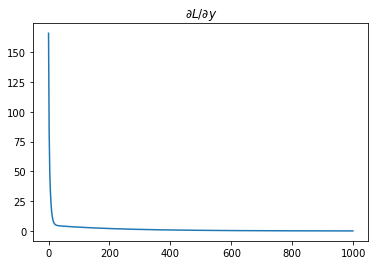

In [5]:
plt.title('$\partial L/\partial y$')
plt.plot(grads)
plt.show()

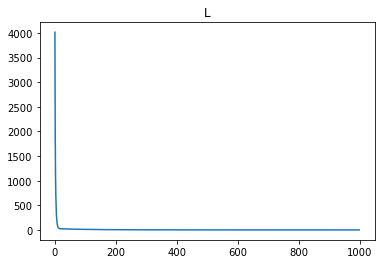

In [6]:
plt.title('L')
plt.plot(losses)
plt.show()

### Linear regression using gradient descent

{'input_dim': 10, 'output_dim': 1, 'layer': 'dense', 'activation': 'none', 'use_bias': True, 'requires_wgrad': True}
trainable parameters: 11


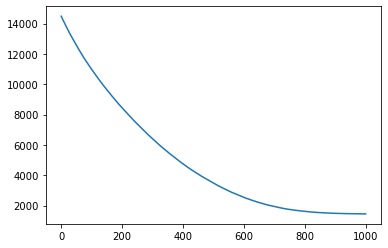

In [7]:
# sci-kit learn's diabetes dataset

x_train, y_train = datasets.load_diabetes(return_X_y=True)
x_train, y_train = dl2.normalize(x_train), np.expand_dims(y_train, 1)

model = dl2.NN() # initialize a net
model.add(dl2.dense(1, input_dim=10)) # add layers
model.init() # initialize weights, biases and # trainable params
model.info() # print model architecture and # trainable params

model.opt, model.loss_fn = dl2.Adagrad(model.params(), 1e-2), 'mse' # initialize optimizer and loss function
model.tqdm_disable = True
history = model.fit(x_train, y_train, batch_size=5, epochs=1000, shuffle=True) # train the model
plt.plot(history['losses']) # plot losses
plt.show() 

### Logistic regression using gradient descent

{'input_dim': 30, 'output_dim': 1, 'layer': 'dense', 'activation': 'sigmoid', 'use_bias': True, 'requires_wgrad': True}
trainable parameters: 31


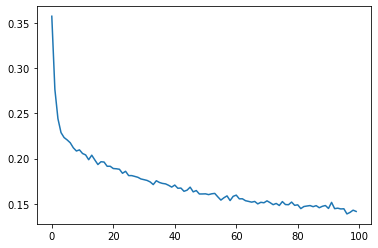

accuracy - 94.02 %


In [8]:
# sci-kit learn's breast cancer dataset

x_train, y_train = datasets.load_breast_cancer(return_X_y=True)
x_train, y_train = dl2.normalize(x_train), np.expand_dims(y_train, 1)

model = dl2.NN()
model.add(dl2.dense(1, input_dim=30, activation='sigmoid'))
model.init()
model.info()

model.opt, model.loss_fn = dl2.Adagrad(model.params(), 1e-1), 'ce' # ce - cross entropy loss
model.tqdm_disable = True
history = model.fit(x_train, y_train, batch_size=2, epochs=100, shuffle=True) 
plt.plot(history['losses'])
plt.show()

ct = 0
for x, y in zip(x_train, y_train):
    ct += round(model.forward(x)[0]) == y[0]
print(f'accuracy - {round(100 * ct / 569, 2)} %')

### Polynomial regression using gradient descent

{'input_dim': 3, 'output_dim': 1, 'layer': 'dense', 'activation': 'none', 'use_bias': True, 'requires_wgrad': True}
trainable parameters: 4


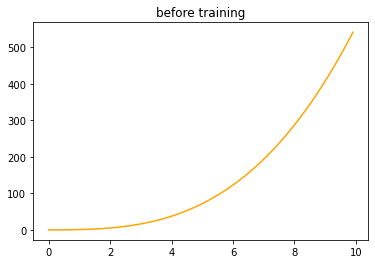

In [9]:
x = np.arange(0, 10, 0.1)
y = 2 * x ** 3 + 4 * x ** 2 + 3 * x + 1
px = [np.array([xi ** 3, xi ** 2, xi]) for xi in x]

model = dl2.NN()
model.add(dl2.dense(1, input_dim=3))
model.init()
model.info()

plt.title('before training')
plt.plot(x, [model.forward(pxi)[0] for pxi in px], c='orange')
plt.show()

model.opt, model.loss_fn = dl2.GD(model.params(), 1e-5, 0), 'mse'
model.tqdm_disable = True
history = model.fit(px, y, epochs=20, batch_size=100)

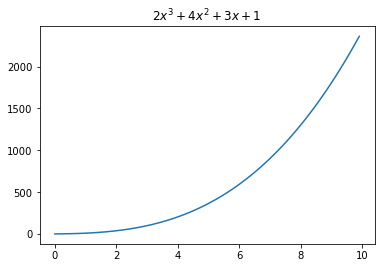

In [10]:
plt.title('$2x^3+4x^2+3x+1$')
plt.plot(x, y)
plt.show()

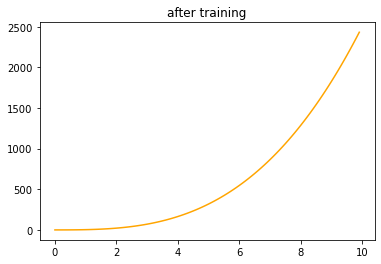

In [11]:
plt.title('after training')
plt.plot(x, [model.forward(pxi)[0] for pxi in px], c='orange')
plt.show()

In [12]:
def net_sup():
    net_sup = dl2.NN()
    net_sup.add(dl2.dense(100, input_dim=20, activation='lrelu'))
    net_sup.add(dl2.expand(reshape=(10, 10, 1)))
    net_sup.add(dl2.conv2dT(channels=4, filters_dim=(2, 2), strides=(2, 2), activation='lrelu'))
    net_sup.add(dl2.poolT(pool_size=(2, 2), strides=(2, 2)))
    net_sup.add(dl2.conv2d(filters=4, filters_dim=(2, 2), strides=(2, 2), activation='lrelu'))
    net_sup.add(dl2.avg_pool(pool_size=(2, 2), strides=(2, 2)))
    net_sup.add(dl2.flatten())
    net_sup.add(dl2.dense(10, activation='lrelu'))
    net_sup.init()
    return net_sup

In [13]:
def net_sub():
    net_sub = dl2.NN()
    net_sub.add(dl2.dense(100, input_dim=10, activation='lrelu'))
    net_sub.add(dl2.expand(reshape=(10, 10, 1)))
    net_sub.add(dl2.conv2dT(channels=4, filters_dim=(2, 2), strides=(2, 2), activation='lrelu'))
    net_sub.add(dl2.poolT(pool_size=(2, 2), strides=(2, 2)))
    net_sub.add(dl2.conv2d(filters=4, filters_dim=(2, 2), strides=(2, 2), activation='lrelu'))
    net_sub.add(dl2.conv2d(filters=1, filters_dim=(2, 2), strides=(2, 2), activation='lrelu'))
    net_sub.add(dl2.flatten())
    net_sub.add(dl2.dense(10, activation='lrelu'))
    net_sub.init()
    return net_sub

In [14]:
x = np.random.uniform(-1, 1, 20)
x

array([-0.53788807,  0.11503733,  0.86339612, -0.27190974,  0.53980761,
        0.95966729, -0.96874617, -0.75984371,  0.58809119, -0.02014171,
        0.22481032, -0.1469072 ,  0.92284586,  0.86894084,  0.8482206 ,
       -0.84335375,  0.1435359 , -0.60227573, -0.19390579,  0.95326375])

In [15]:
sub_net1, sub_net2 = net_sub(), net_sub()
sup_net1, sup_net2 = net_sup(), net_sup()

In [16]:
def forward(x, sub_net1, sub_net2, sup_net1, sup_net2):
    sub_net1_z, sub_net2_z = sub_net1.forward(x[:10]), sub_net2.forward(x[10:])
    sub_net1_L, sub_net2_L = sub_net1.L, sub_net2.L
    
    sub_x = np.concatenate((sub_net1_z, sub_net2_z), axis=0)
    
    sup_net1_z, sup_net2_z = sup_net1.forward(sub_x), sup_net2.forward(sub_x)                                                                                                                                  
    sup_net1_L, sup_net2_L = sup_net1.L, sup_net2.L
    
    z = np.concatenate((sup_net1_z, sup_net2_z), axis=0) 
    
    return z, x, sub_net1_L, sub_net2_L, sup_net1_L, sup_net2_L

In [17]:
z, x, sub_net1_L, sub_net2_L, sup_net1_L, sup_net2_L = forward(x, sub_net1, sub_net2, sup_net1, sup_net2)
z

array([-7.10796520e-06,  6.28856778e-02, -6.79504413e-07,  6.36118407e-02,
       -2.73848480e-05, -1.57216694e-06, -5.44804470e-06, -2.44342218e-05,
        8.89199926e-02, -2.42286751e-06, -1.81226272e-04,  4.11667282e-02,
       -2.71670264e-06, -1.57955670e-04, -9.87981191e-06,  1.16361020e-01,
       -4.39731468e-05,  2.82559115e-02,  1.85912020e-01,  2.51244638e-02])

### another example

In [18]:
outer = dl2.NN()
outer.add(dl2.dense(10, input_dim=(1), activation='lrelu'))
outer.add(dl2.dense(10, activation='lrelu'))
outer.add(dl2.dense(1, activation='lrelu'))
outer.init()
outer.info()

{'input_dim': 1, 'output_dim': 10, 'layer': 'dense', 'activation': 'lrelu', 'use_bias': True, 'requires_wgrad': True}
{'input_dim': 10, 'output_dim': 10, 'layer': 'dense', 'activation': 'lrelu', 'use_bias': True, 'requires_wgrad': True}
{'input_dim': 10, 'output_dim': 1, 'layer': 'dense', 'activation': 'lrelu', 'use_bias': True, 'requires_wgrad': True}
trainable parameters: 141


In [19]:
inner = dl2.NN()
inner.add(dl2.dense(10, input_dim=(1), activation='lrelu'))
inner.add(dl2.dense(10, activation='lrelu'))
inner.add(dl2.dense(1, activation='lrelu'))
inner.init()
inner.info()

{'input_dim': 1, 'output_dim': 10, 'layer': 'dense', 'activation': 'lrelu', 'use_bias': True, 'requires_wgrad': True}
{'input_dim': 10, 'output_dim': 10, 'layer': 'dense', 'activation': 'lrelu', 'use_bias': True, 'requires_wgrad': True}
{'input_dim': 10, 'output_dim': 1, 'layer': 'dense', 'activation': 'lrelu', 'use_bias': True, 'requires_wgrad': True}
trainable parameters: 141


In [20]:
outer.loss_fn, inner.loss_fn = 'mse', 'none' # initialize loss functions for outer and inner network
x = np.array([4.]) # input
w0, w1, w2, w3 = np.array([6.]), np.array([2.]), np.array([4.]), np.array([1.]) # initialize parameters 

In [21]:
f = lambda x, w0, w1, w2, w3: w0 * outer.forward(w1 * x ** 2 + w2 * x + inner.forward(w3 * x)) # the comp graph
y = 10 # label

In [22]:
# dl2.GD(parameters, learning rate, beta)
opt = dl2.GD(outer.params() + inner.params() + [w0, w1, w2, w3], 1e-5, 0)
losses, grads = [], []

In [23]:
print(f'before training\npred: {f(x, w0, w1, w2, w3)[0]}\ny: {y}\nloss: {0.5 * np.sum((f(x, w0, w1, w2, w3) - y) ** 2)}\n')
for i in range(30):
    dy = f(x, w0, w1, w2, w3) - y # compute gradient of loss w.r.t to output
    loss = 0.5 * np.sum(dy ** 2) # compute loss
    losses.append(loss) 
    grads.append(np.sum(dy))
    outerdW, outerdB, dz = outer.backward(dy) # compute outer network gradients
    innerdW, innerdB, dz_ = inner.backward(dz) # compute inner network gradients
    dw0, dw1, dw2, dw3 = dy + y, dz * 2 * w1 * x * x, dz * x, dz * dz_ * x # compute other gradients
    opt.dP = [outerdW, outerdB, innerdW, innerdB, dw0, dw1, dw2, dw3]
    outer.W, outer.B, inner.W, inner.B, w0, w1, w2, w3 = opt.step() # update parameters
print(f'\nafter training\npred: {f(x, w0, w1, w2, w3)[0]}\ny: {y}\nloss: {0.5 * np.sum((f(x, w0, w1, w2, w3) - y) ** 2)}')

before training
pred: 46.02055810627806
y: 10
loss: 648.740303143877


after training
pred: 10.009967557404318
y: 10
loss: 4.967610030418602e-05


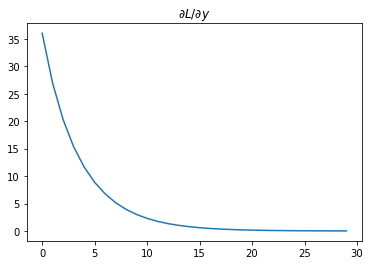

In [24]:
plt.title('$\partial L/\partial y$')
plt.plot(grads)
plt.show()

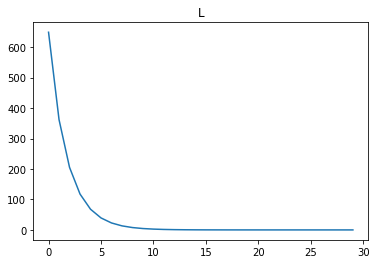

In [25]:
plt.title('L')
plt.plot(losses)
plt.show()